In [ ]:
!pip install keras-cv keras-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.1/803.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 12.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm

Using TensorFlow backend


In [ ]:
pretrained_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc", bounding_box_format="xywh"
)

142662880/142662880 [==============================] - 2s 0us/step


1293053/1293053 [==============================] - 0s 0us/step


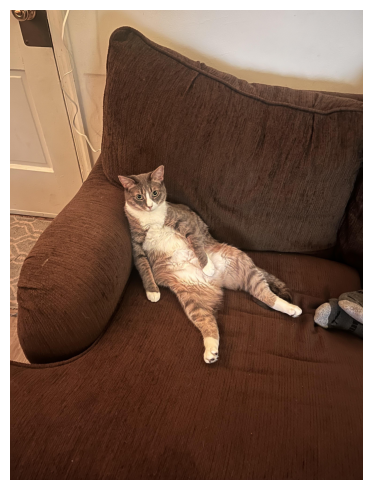

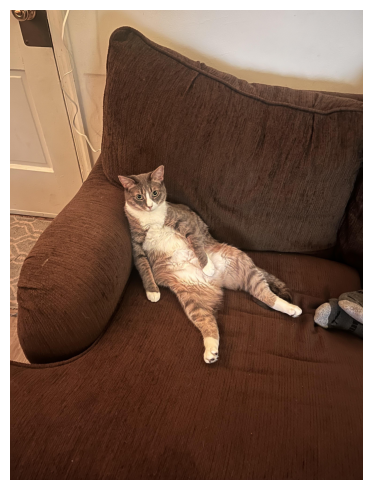

In [ ]:
url = 'https://i.redd.it/twpfhcw58xgb1.jpg'
filepath = tf.keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1, h, w, c)

visualization.plot_image_gallery(
    batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

In [ ]:
inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)

In [ ]:
image_batch = inference_resizing(batch)

In [ ]:
label_names = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
id2label = {k: v for k, v in enumerate(label_names)}

1/1 [==============================] - 38s 38s/step


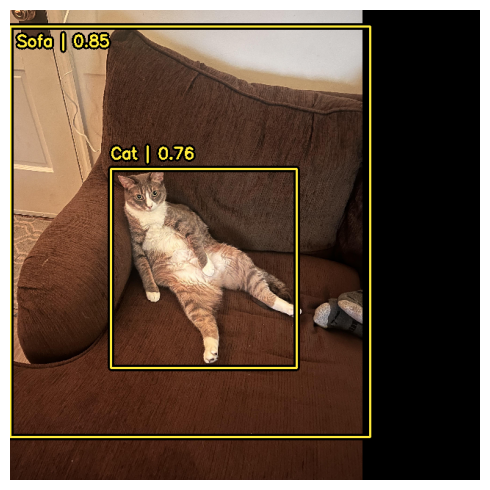

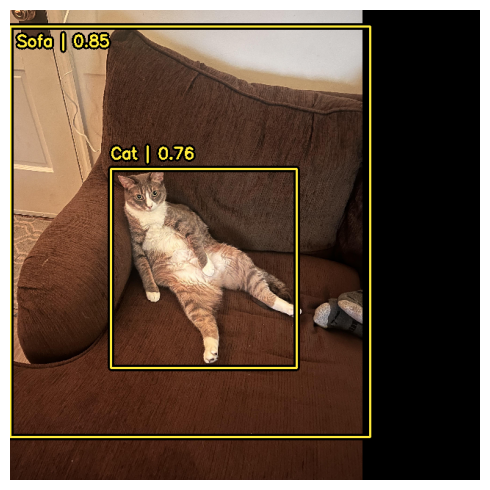

In [ ]:
y_pred = pretrained_model.predict(image_batch)
# y_pred is a bounding box Tensor:
# {"classes": ..., boxes": ...}
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

In [ ]:
y_pred

{'boxes': array([[[ -0.88674927,  22.110718  , 491.30432   , 559.44366   ],
         [137.17673   , 216.78041   , 253.07513   , 270.2732    ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  -1.        ],
         [ -1.        ,  -1.        ,  -1.        ,  

## Non-Max Suppression

In [ ]:
url = 'https://archive.org/download/street_202308/street.jpeg'
filepath = tf.keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1, h, w, c)
image_batch = inference_resizing(batch)

43419/43419 [==============================] - 0s 2us/step


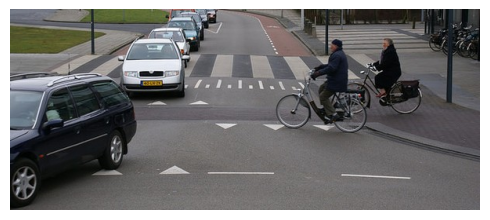

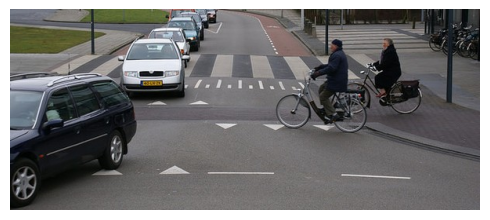

In [ ]:
visualization.plot_image_gallery(
    batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

1/1 [==============================] - 5s 5s/step


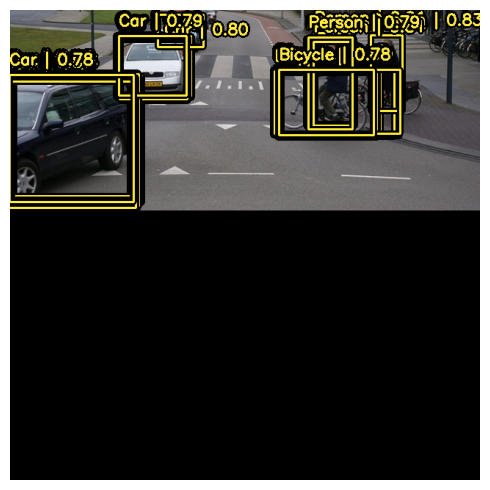

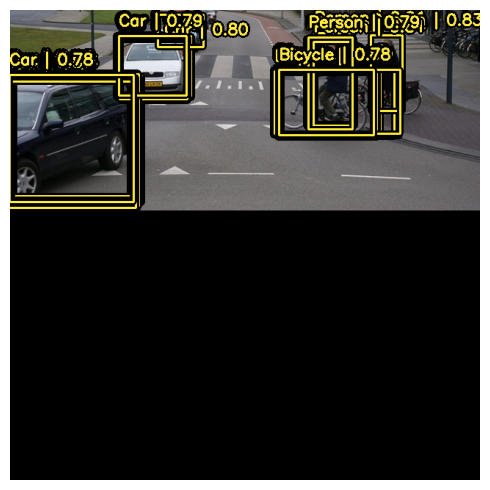

In [ ]:
# The following NonMaxSuppression layer is equivalent to disabling the operation
prediction_decoder = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=1.0,
    confidence_threshold=0.0,
)
pretrained_model.prediction_decoder = prediction_decoder

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

1/1 [==============================] - 5s 5s/step


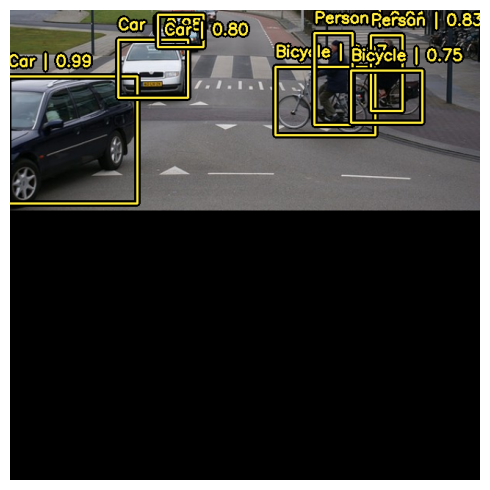

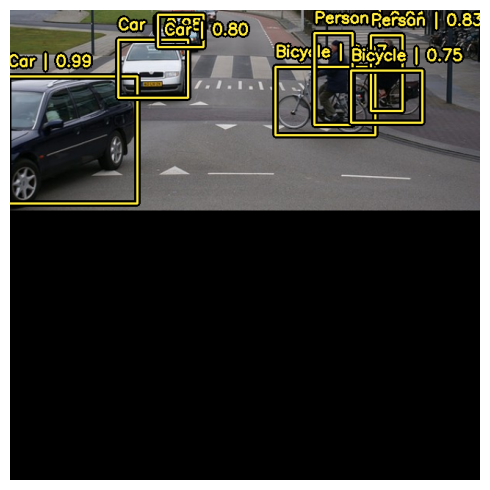

In [ ]:
# Try it again!
prediction_decoder = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    # Decrease the required threshold to make predictions get pruned out
    iou_threshold=0.2,
    # Tune confidence threshold for predictions to pass NMS
    confidence_threshold=0.7,
)
pretrained_model.prediction_decoder = prediction_decoder

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=IA0ul7WCKUKkKzN0mNuLXQ&n=Pretrained+Object+Detection)